## Japan

### Setup

In [2]:
file_jp = pd.ExcelFile('JPN_wk_may_2013.xlsx')

In [3]:
file_jp.sheet_names

['Notes', 'DATA', 'DATA_ALT']

In [12]:
prints(file_jp.parse('Notes', usecols=[0,1])
              .dropna(how="all")
              .set_axis(["Variable", "Description"], axis=1)
      )

,Variable,Description
0,WORLD KLEMS - Basic Tables,NaN
1,May 2013 release,NaN
3,Variables,NaN
5,Values,NaN
6,GO,Gross output at current basic prices (in millions of Japanese Yen)
7,II,Intermediate inputs at current purchasers' prices (in millions of Japanese Yen)
8,VA,Gross value added at current basic prices (in millions of Japanese Yen)
9,EMP,Number of persons engaged (thousands)
10,H_EMP,Total hours worked by persons engaged (millions)
12,Prices,NaN


In [13]:
df_jp = file_jp.parse('DATA')

In [32]:
df_jp = (df_jp.rename(columns = lambda x: pd.to_numeric(x.replace('_',''), 
                                                       errors='ignore'))
        )

### Test

<AxesSubplot:>

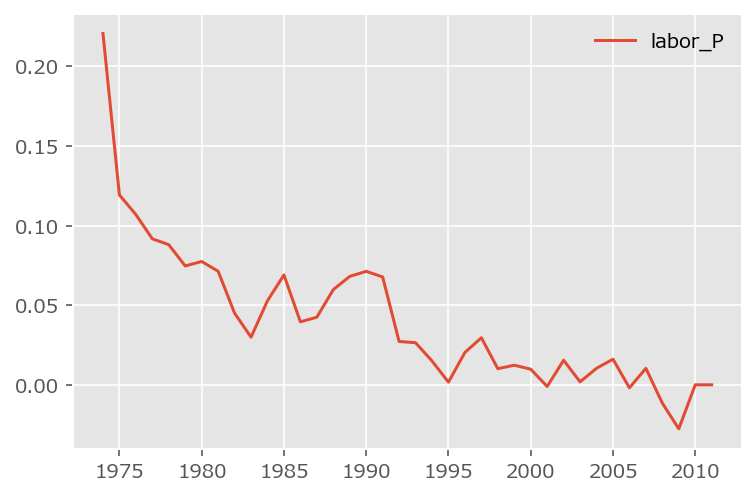

In [33]:
# calculate labor productivity on Value-added
var = ["VA", "H_EMP"]
ind = "TOT"
(df_jp.query("Variable in @var & code in @ind")
      .iloc[:,3:].T.set_axis(var, axis=1)
      .eval("labor_P = VA / H_EMP")
      .pct_change()
).plot(y="labor_P")

<AxesSubplot:>

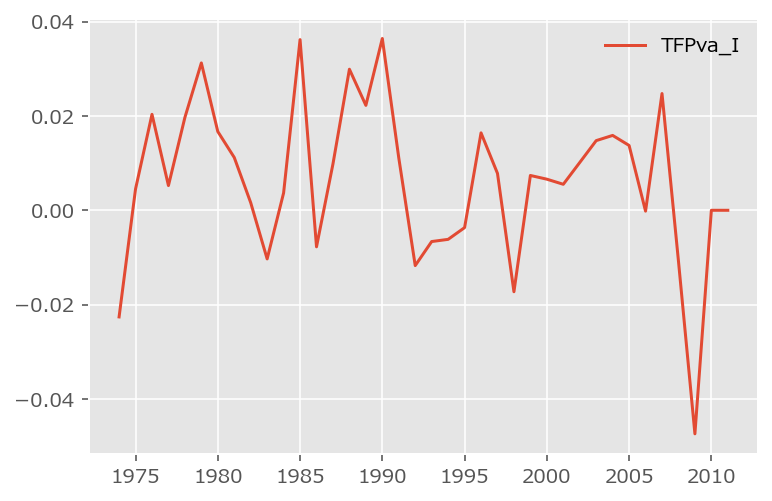

In [34]:
# plot TFP on Value-added in data
var = ["TFPva_I"]
(df_jp.query("Variable in @var & code in @ind")
      .iloc[:,3:].T.set_axis(var, axis=1)
      .pct_change()
).plot()